#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score


## Load Dataset

In [67]:
# Read CSV
ds = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
ds.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
ds.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [4]:
ds.duplicated().any()

True

Periksa apakah ada missing values

In [6]:
ds.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

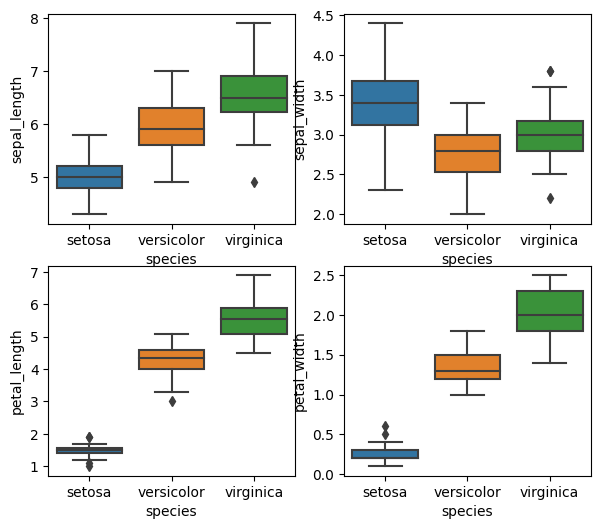

In [12]:
plt.figure(figsize=(7, 6))
for x in ds.columns[:4]:
    plt.subplot(2, 2, ds.columns.get_loc(x) + 1)
    sns.boxplot(x='species', y=x, data=ds)
plt.show()


Pisahkan dataset menjadi variabel independen dan variabel dependen

In [13]:
x = ds.drop(['species'], axis=1)
y = ds['species']


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

Bangun model dan ukur accuracy nya

In [39]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
print(lr)


LogisticRegression(random_state=0)


Uji model dengan dataset test

In [40]:
y_pred = lr.predict(x_test)
print(y_pred)


['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


In [42]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[3 0 0]
 [0 8 0]
 [0 0 4]]
1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [47]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print(nb)

GaussianNB()


Uji hasil model dengan data test

In [48]:
# test model dengan testing data
y_pred_nb = nb.predict(x_test)
print(y_pred_nb)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [51]:
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))

[[3 0 0]
 [0 8 0]
 [0 1 3]]
0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [59]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(x_train, y_train)
print(knn)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [60]:
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [61]:
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

[[3 0 0]
 [0 8 0]
 [0 0 4]]
1.0


# Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Model klasifikasi KNN dan Logistic Regression memperoleh accuracy score 100%, dan NB (Naive Bayes) mendapatkan 93%, sehingga dapat disimpulkan kedua model klasifikasi KNN dan Logistic Regression adalah model dengan akurasi tertinggi, setelah itu diikuti oleh Naive Bayes dengan accuracy score 93%

Logistic Regression:

![LR](https://cdn.discordapp.com/attachments/1105409280405950495/1159383607811526676/image.png?ex%253D6530d320%2526is%253D651e5e20%2526hm%253Df095b62af5b8ad9fdc41eec2fcc501cf08562f4a68615bdb95951805f378844d%2526)

Naive Bayes:

![Alt text](https://cdn.discordapp.com/attachments/1105409280405950495/1159383935982239754/image.png?ex%253D6530d36e%2526is%253D651e5e6e%2526hm%253D206256a24e593e3acac4d0536cd4d193852a94a7eb478140c05d7bd380833752%2526)

KNN: 

![Alt text](https://cdn.discordapp.com/attachments/1105409280405950495/1159384050998448189/image.png?ex%253D6530d38a%2526is%253D651e5e8a%2526hm%253D6ab6e9b9ed7f5711501c19635aae47ac2de583d63b9d927c9f670640c66341a2%2526)
